In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data = pd.read_csv('train.csv')

In [4]:
import data_preprocessor
from data_preprocessor import DataPreProcessor
instance = DataPreProcessor()
clean_data =  instance.cleanData(df_sales=data)

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(clean_data.sales, order=(5,3,4))
model_fit = model.fit()
print(model_fit.summary())

c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   47
Model:                 ARIMA(5, 3, 4)   Log Likelihood                -572.993
Date:                Mon, 29 Apr 2024   AIC                           1165.986
Time:                        22:39:22   BIC                           1183.828
Sample:                             0   HQIC                          1172.603
                                 - 47                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2130      0.200     -6.076      0.000      -1.604      -0.822
ar.L2         -1.1198      0.184     -6.095      0.000      -1.480      -0.760
ar.L3         -1.1487      0.187     -6.135      0.0

c:\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


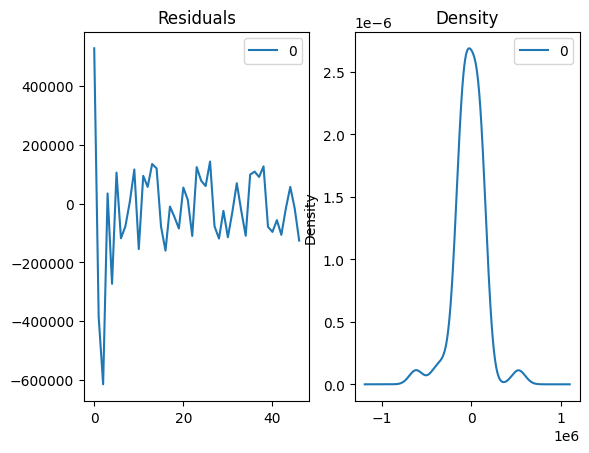

In [21]:
import matplotlib.pyplot as plt
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

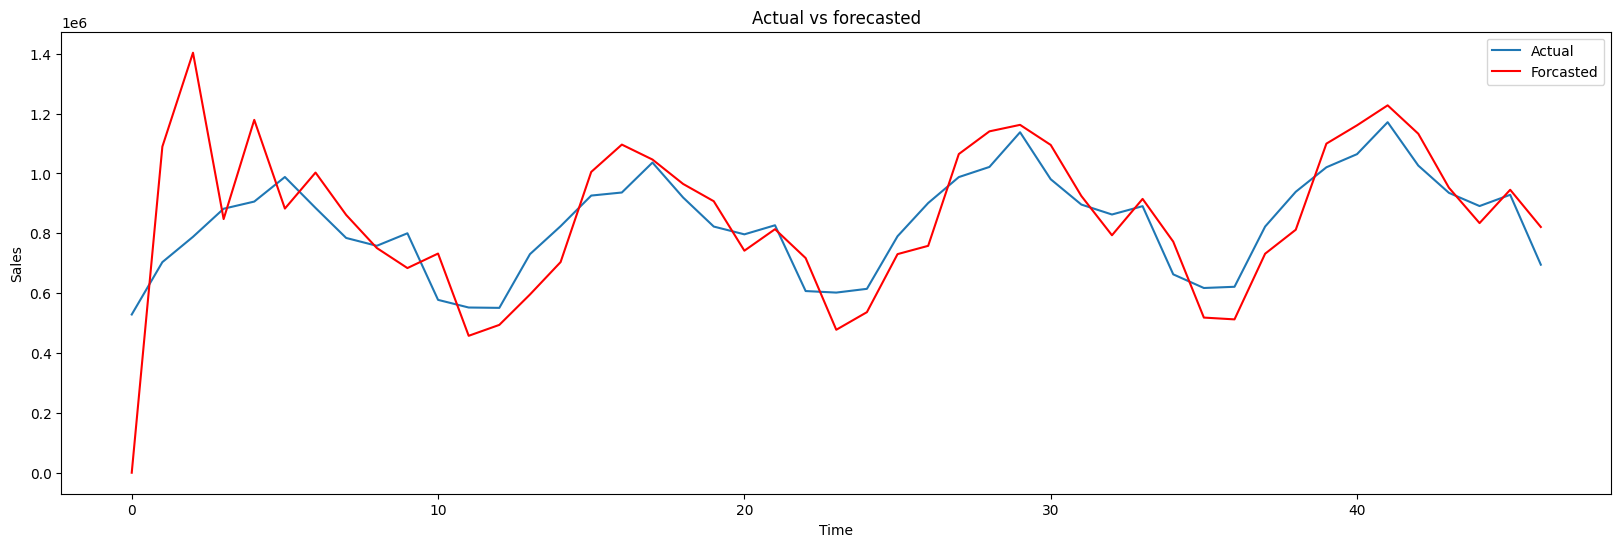

In [22]:
# Get the fitted values
fitted_values = model_fit.fittedvalues

# Plot actual vs fitted values
plt.figure(figsize=(20, 6))
plt.plot(clean_data.sales, label='Actual')
plt.plot(fitted_values, color='red', label='Forcasted')
plt.title('Actual vs forecasted')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [23]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = clean_data.sales[:70]
test = clean_data.sales[70:]

In [24]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
# mae = mean_absolute_error(clean_data.sales, fitted_values)
mape = mean_absolute_percentage_error(clean_data.sales, fitted_values)
# maeM = np.mean(np.abs(fitted_values - clean_data)) 

# print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
# print("Mean Error (ME):", maeM)

Mean Absolute Percentage Error (MAPE): 0.15120664792307476


In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(clean_data.sales), len(clean_data.sales)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(clean_data.sales)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()
